<a href="https://colab.research.google.com/github/InsightByHarshit/Amazon-Stock-Analysis/blob/main/Amazon_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file = '/content/drive/MyDrive/Colab Notebooks/Stocks/Part1_data.csv'
data = pd.read_csv(file)

In [ ]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
data['Date']

,Date
0,01-10-2010
1,04-10-2010
2,05-10-2010
3,06-10-2010
4,07-10-2010
...,...
2512,24-09-2020
2513,25-09-2020
2514,28-09-2020
2515,29-09-2020


In [9]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Changed the format string to '%d-%m-%Y' to match the actual date format in the data
data.sort_values('Date', inplace=True)
data.set_index('Date', inplace=True)

In [10]:
# 1. Inspect the first few rows of the dataset
print(data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2010-10-01  157.080002  157.440002  152.199997  153.710007  153.710007   
2010-10-04  153.949997  155.960007  152.789993  155.389999  155.389999   
2010-10-05  157.080002  161.210007  157.009995  160.869995  160.869995   
2010-10-06  160.600006  160.679993  154.600006  155.399994  155.399994   
2010-10-07  156.509995  157.399994  153.389999  156.270004  156.270004   

             Volume  
Date                 
2010-10-01  8683400  
2010-10-04  5346500  
2010-10-05  5620000  
2010-10-06  6060800  
2010-10-07  4622000  


In [11]:
# 2. Check the data types and non-null counts
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2010-10-01 to 2020-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6 KB
None


In [12]:
# 3. Display summary statistics
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2517.000000  2517.000000  2517.000000  2517.000000  2517.000000   
mean    854.694502   863.694672   844.614346   854.636107   854.636107   
std     745.456591   754.210120   735.446543   745.201139   745.201139   
min     152.509995   155.960007   151.399994   153.029999   153.029999   
25%     266.809998   269.480011   263.850006   266.489990   266.489990   
50%     534.479980   539.390015   526.599976   533.750000   533.750000   
75%    1495.339966  1525.380005  1478.500000  1500.000000  1500.000000   
max    3547.000000  3552.250000  3486.689941  3531.449951  3531.449951   

             Volume  
count  2.517000e+03  
mean   4.326001e+06  
std    2.410250e+06  
min    8.813000e+05  
25%    2.769400e+06  
50%    3.710900e+06  
75%    5.111000e+06  
max    2.413420e+07  


In [13]:
# 4. Check for missing values
print(data.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# **Univariate Analysis**

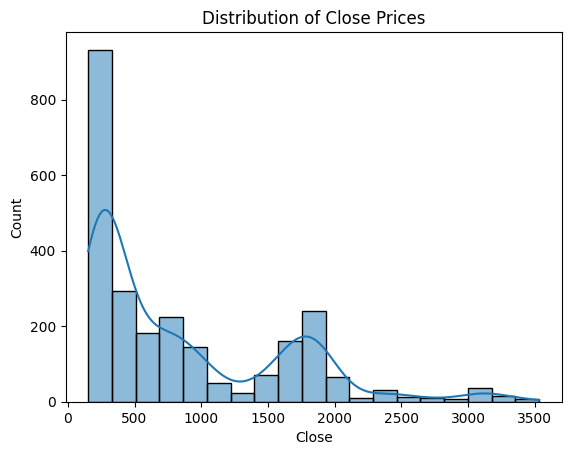

In [14]:
# 5. Plot the distribution of the 'Close' column
sns.histplot(data['Close'], kde=True)
plt.title('Distribution of Close Prices')
plt.show()

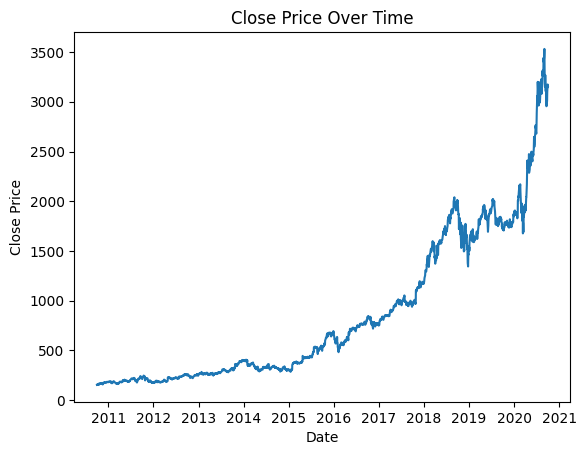

In [15]:
# 6. Plot a line graph of the 'Close' column over time
plt.plot(data['Close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

In [16]:
# 7. Compute correlation between numerical columns
correlation = data.corr()
print("Correlation Matrix:\n", correlation)

Correlation Matrix:
                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999858  0.999813  0.999676   0.999676  0.064950
High       0.999858  1.000000  0.999755  0.999838   0.999838  0.069489
Low        0.999813  0.999755  1.000000  0.999845   0.999845  0.058641
Close      0.999676  0.999838  0.999845  1.000000   1.000000  0.063936
Adj Close  0.999676  0.999838  0.999845  1.000000   1.000000  0.063936
Volume     0.064950  0.069489  0.058641  0.063936   0.063936  1.000000


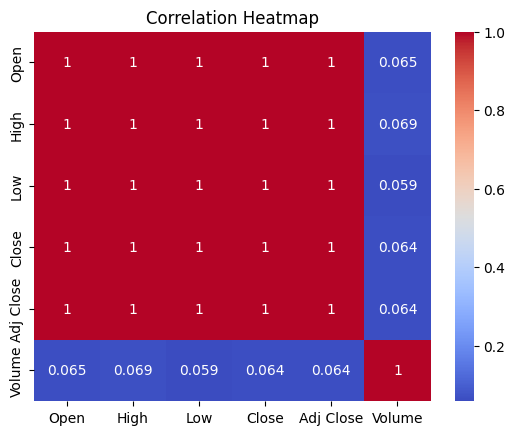

In [17]:
# 8. Visualize the correlation matrix using a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

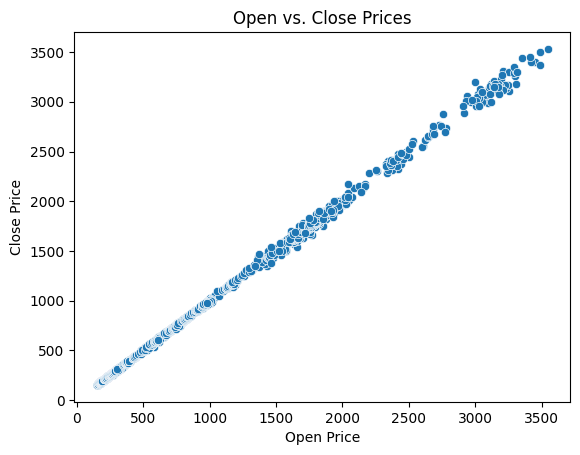

In [18]:
# 9. Plot scatter plot between 'Open' and 'Close'
sns.scatterplot(x=data['Open'], y=data['Close'])
plt.title('Open vs. Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()


In [19]:
# 10. Find the day with the highest trading volume
max_volume_date = data['Volume'].idxmax()
print(f"Day with highest trading volume: {max_volume_date}")
print(data.loc[max_volume_date])

Day with highest trading volume: 2011-10-26 00:00:00
Open         2.036900e+02
High         2.075800e+02
Low          1.965100e+02
Close        1.984000e+02
Adj Close    1.984000e+02
Volume       2.413420e+07
Name: 2011-10-26 00:00:00, dtype: float64


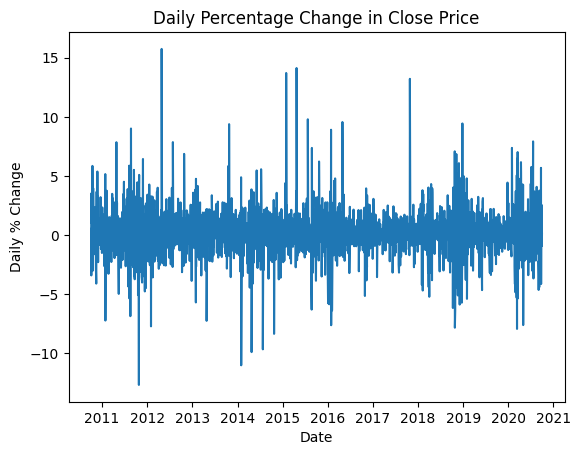

In [20]:
# 11. Plot the daily percentage change of the 'Close' column
data['Daily_Change_%'] = data['Close'].pct_change() * 100
plt.plot(data['Daily_Change_%'])
plt.title('Daily Percentage Change in Close Price')
plt.xlabel('Date')
plt.ylabel('Daily % Change')
plt.show()

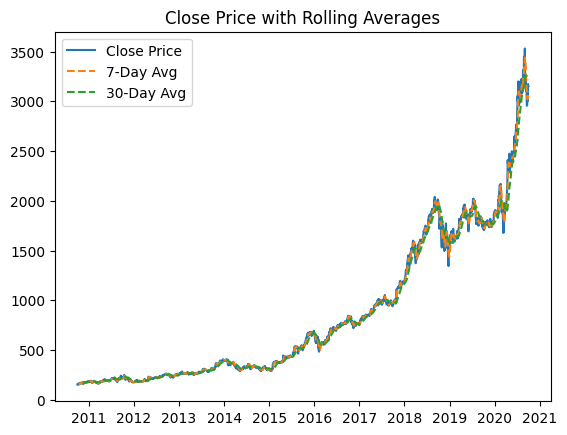

In [21]:
# 12. Calculate and visualize rolling averages for 'Close'
data['7_day_avg'] = data['Close'].rolling(window=7).mean()
data['30_day_avg'] = data['Close'].rolling(window=30).mean()
plt.plot(data['Close'], label='Close Price')
plt.plot(data['7_day_avg'], label='7-Day Avg', linestyle='--')
plt.plot(data['30_day_avg'], label='30-Day Avg', linestyle='--')
plt.legend()
plt.title('Close Price with Rolling Averages')
plt.show()

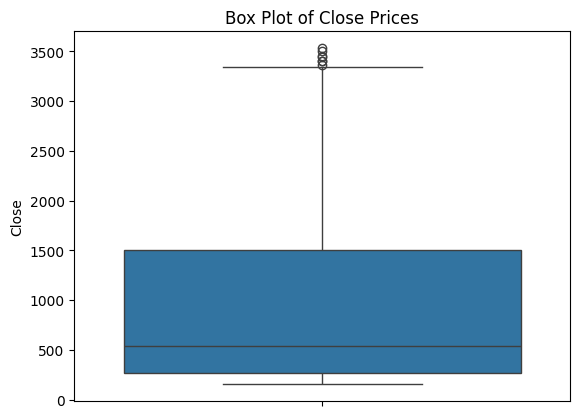

In [22]:
# 13. Box plot to identify outliers in 'Close'
sns.boxplot(data['Close'])
plt.title('Box Plot of Close Prices')
plt.show()

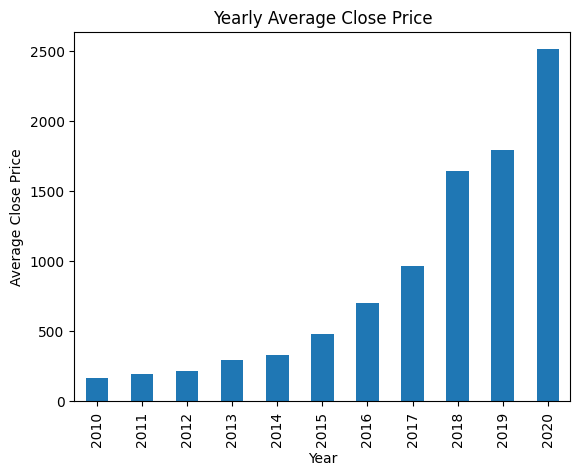

In [23]:
# 14. Yearly average close price
data['Year'] = data.index.year
yearly_avg_close = data.groupby('Year')['Close'].mean()
yearly_avg_close.plot(kind='bar')
plt.title('Yearly Average Close Price')
plt.xlabel('Year')
plt.ylabel('Average Close Price')
plt.show()

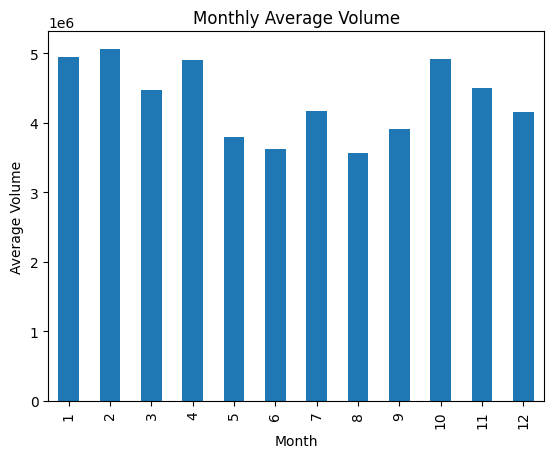

In [24]:
# 15. Monthly average volume
data['Month'] = data.index.month
monthly_avg_volume = data.groupby('Month')['Volume'].mean()
monthly_avg_volume.plot(kind='bar')
plt.title('Monthly Average Volume')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.show()

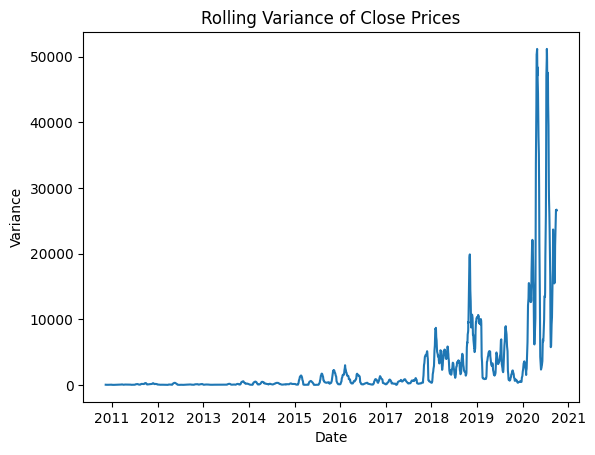

In [25]:
# 16. Moving variance of 'Close' prices
data['Rolling_Variance'] = data['Close'].rolling(window=30).var()
plt.plot(data['Rolling_Variance'])
plt.title('Rolling Variance of Close Prices')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.show()

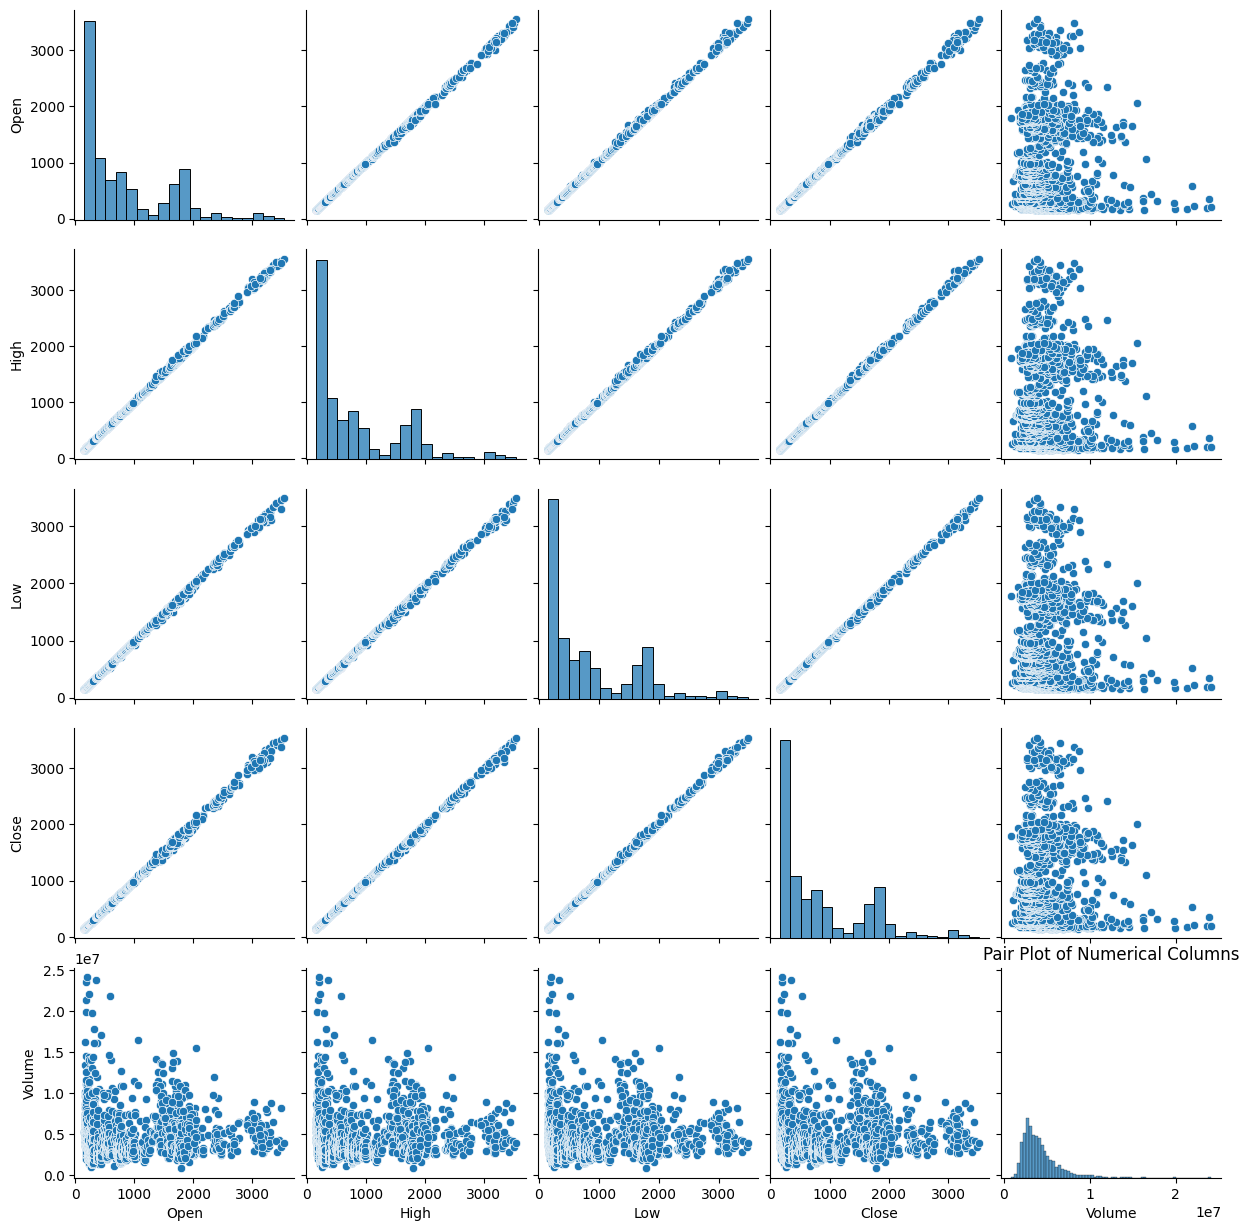

In [26]:
# 17. Pair plot to explore relationships
sns.pairplot(data[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title('Pair Plot of Numerical Columns')
plt.show()

In [27]:
# 18. Top 5 days with highest volatility
volatility = data['High'] - data['Low']
data['Volatility'] = volatility
top_volatility_days = data.sort_values('Volatility', ascending=False).head()
print("Top 5 Volatile Days:\n", top_volatility_days[['High', 'Low', 'Volatility']])

Top 5 Volatile Days:
                    High          Low  Volatility
Date                                            
2020-07-13  3344.290039  3068.389893  275.900146
2020-09-04  3381.500000  3111.129883  270.370117
2020-07-20  3201.360107  2994.020020  207.340087
2020-09-03  3488.409912  3303.000000  185.409912
2020-09-10  3349.889893  3170.550049  179.339844


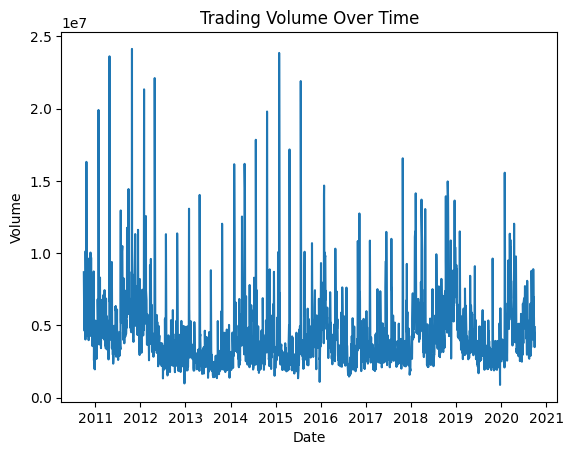

In [28]:
# 19. Analyze volume and its trend over time
plt.plot(data['Volume'])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

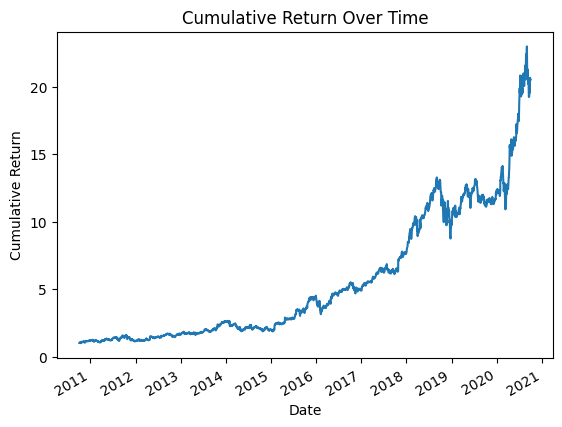

In [29]:
# 20. Plot cumulative return of Close prices
data['Cumulative_Return'] = (1 + data['Daily_Change_%'] / 100).cumprod()
data['Cumulative_Return'].plot()
plt.title('Cumulative Return Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()